Hipótese: O etanol é mais barato nos estados que o produzem?

In [1]:
import pandas as pd

df_produtores_etanol_por_estado = pd.read_csv('../data/pruducao_etanol_limpo.csv')

precos_combustiveis = pd.read_csv('../data/br_oil_prices_formatado.csv', delimiter=";")

In [2]:
# Importação das bibliotecas de geração de mapa
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import scipy
from scipy.stats import ttest_ind

In [3]:
df_produtores_etanol_por_estado[:1]

,ano,MÊS,regiao,sigla_uf,PRODUTO,producao
0,2012,JAN,NORTE,RO,ANIDRO,0


In [4]:
df_produtores_etanol_por_estado['producao'] = df_produtores_etanol_por_estado['producao'].str.replace(',','.')

df_produtores_etanol_por_estado['producao'] = pd.to_numeric(df_produtores_etanol_por_estado['producao'],errors = 'raise')

In [5]:
df_produtores_etanol_por_estado[-10:]

,ano,MÊS,regiao,sigla_uf,PRODUTO,producao
6677,2022,MAR,NORDESTE,SE,HIDRATADO,1542.472
6678,2022,ABR,NORDESTE,SE,HIDRATADO,0.000
6679,2022,MAI,NORDESTE,SE,HIDRATADO,0.000
6680,2022,JUN,NORDESTE,SE,HIDRATADO,0.000
6681,2022,JAN,NORTE,TO,HIDRATADO,0.000
6682,2022,FEV,NORTE,TO,HIDRATADO,0.000
6683,2022,MAR,NORTE,TO,HIDRATADO,4438.301
6684,2022,ABR,NORTE,TO,HIDRATADO,18001.194
6685,2022,MAI,NORTE,TO,HIDRATADO,10539.821
6686,2022,JUN,NORTE,TO,HIDRATADO,19434.677


In [6]:
df_produtores_etanol_por_estado = df_produtores_etanol_por_estado.loc[(df_produtores_etanol_por_estado['ano'] >= 2004) & (df_produtores_etanol_por_estado['ano'] <= 2021)]
df_produtores_etanol_por_estado[-5:]

,ano,MÊS,regiao,sigla_uf,PRODUTO,producao
6358,2021,AGO,CENTRO OESTE,DF,HIDRATADO,0.0
6359,2021,SET,CENTRO OESTE,DF,HIDRATADO,0.0
6360,2021,OUT,CENTRO OESTE,DF,HIDRATADO,0.0
6361,2021,NOV,CENTRO OESTE,DF,HIDRATADO,0.0
6362,2021,DEZ,CENTRO OESTE,DF,HIDRATADO,0.0


Criando tabela da media de produção de etanol por estado

In [32]:
df_produtores_etanol_por_estado_media = df_produtores_etanol_por_estado.groupby(['sigla_uf'])['producao'].mean().sort_values(ascending=False)
df_produtores_etanol_por_estado_media


sigla_uf
SP    588653.144875
GO    191267.683087
MG    121116.133314
MS    110893.939042
MT     76172.782137
PR     59681.361713
AL     19292.520996
PB     15304.899546
PE     14804.847603
BA      9088.684276
TO      7274.551729
MA      6916.448954
ES      5511.051447
SE      4516.383106
RN      3894.527444
RJ      3819.329658
PA      1872.029117
PI      1346.705539
RO       259.983695
AM       242.286874
CE       177.761589
RS        99.537445
AC        72.657626
DF         0.000000
RR         0.000000
SC         0.000000
AP         0.000000
Name: producao, dtype: float64

Criando tabela da media do custo de etanol por estado

In [8]:
precos_combustiveis = precos_combustiveis.loc[precos_combustiveis["PRODUTO"] == "ETANOL HIDRATADO"]

In [33]:
precos_combustiveis_media_estado = precos_combustiveis.groupby(['ESTADO'])['PRECO MEDIO REVENDA'].mean().sort_values()
precos_combustiveis_media_estado

ESTADO
SP    1.911203
MT    2.076379
PR    2.082645
GO    2.126071
MG    2.223109
PB    2.327695
MS    2.335140
PE    2.339272
BA    2.382027
DF    2.445850
SC    2.474284
TO    2.478633
AL    2.485334
CE    2.493243
RN    2.493573
SE    2.496145
RJ    2.497282
AM    2.517717
PI    2.519994
MA    2.527702
ES    2.540895
AP    2.582808
RO    2.630662
RS    2.680278
PA    2.750656
RR    2.795797
AC    2.822432
Name: PRECO MEDIO REVENDA, dtype: float64

Menores preços de etanol:
SP    1.911203
MT    2.076379
PR    2.082645
GO    2.126071
MG    2.223109

Maiores produtores de etanol:
SP    588653.144875
GO    191267.683087
MG    121116.133314
MS    110893.939042
MT     76172.782137

Criando os mapas da tabelas geradas acima

In [11]:
gdf_estados = gpd.read_file('../data/ESTADOS')

gdf_estados 



,NOME,NOMEABREV,GEOMETRIAA,SIGLA,GEOCODIGO,geometry
0,Ceará,Ceará,Não,CE,23,"MULTIPOLYGON Z (((-40.20093 -2.81293 0.00000, ..."
1,Distrito Federal,Distrito Federal,Não,DF,53,"MULTIPOLYGON Z (((-29.34586 0.91777 0.00000, -..."
2,Espírito Santo,Espírito Santo,Não,ES,32,"MULTIPOLYGON Z (((-40.28188 -20.30203 0.00000,..."
3,Amapá,Amapá,Não,AP,16,"MULTIPOLYGON Z (((-50.50034 2.09786 0.00000, -..."
4,Roraima,Roraima,Não,RR,14,"POLYGON Z ((-63.37846 2.22966 0.00000, -63.371..."
5,Amazonas,Amazonas,Não,AM,13,"POLYGON Z ((-73.79863 -7.11287 0.00000, -73.79..."
6,Piauí,Piauí,Não,PI,22,"POLYGON Z ((-41.81276 -2.74636 0.00000, -41.80..."
7,Pará,Pará,Não,PA,15,"MULTIPOLYGON Z (((-50.18717 0.62523 0.00000, -..."
8,Acre,Acre,Não,AC,12,"POLYGON Z ((-73.79863 -7.11287 0.00000, -73.73..."
9,Mato Grosso,Mato Grosso,Não,MT,51,"POLYGON Z ((-58.13994 -7.34881 0.00000, -58.13..."


In [12]:
gdf_estados_produtores_populacao = gdf_estados.merge(df_produtores_etanol_por_estado_media, left_on='SIGLA', right_on='sigla_uf')
gdf_estados_produtores_populacao[:5]

,NOME,NOMEABREV,GEOMETRIAA,SIGLA,GEOCODIGO,geometry,producao
0,Ceará,Ceará,Não,CE,23,"MULTIPOLYGON Z (((-40.20093 -2.81293 0.00000, ...",177.761589
1,Distrito Federal,Distrito Federal,Não,DF,53,"MULTIPOLYGON Z (((-29.34586 0.91777 0.00000, -...",0.000000
2,Espírito Santo,Espírito Santo,Não,ES,32,"MULTIPOLYGON Z (((-40.28188 -20.30203 0.00000,...",5511.051447
3,Amapá,Amapá,Não,AP,16,"MULTIPOLYGON Z (((-50.50034 2.09786 0.00000, -...",0.000000
4,Roraima,Roraima,Não,RR,14,"POLYGON Z ((-63.37846 2.22966 0.00000, -63.371...",0.000000


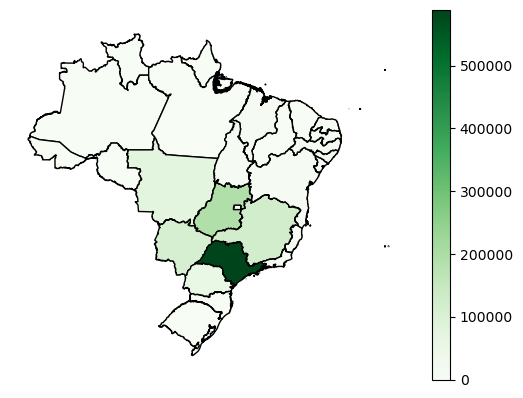

In [13]:
gdf_estados_produtores_populacao.plot(column='producao', legend=True, cmap='Greens', edgecolor='black').set_axis_off()

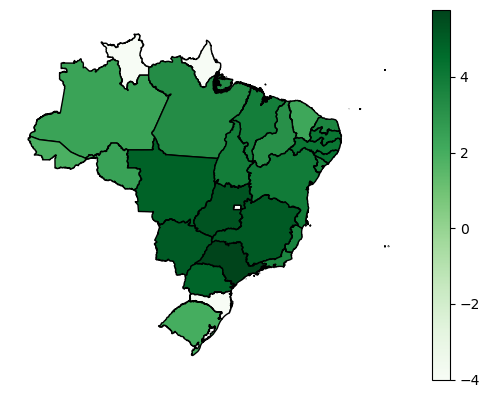

In [14]:
gdf_estados_produtores_populacao.loc[gdf_estados_produtores_populacao['producao'] == 0, "producao"] = 0.0001

gdf_estados_produtores_populacao['producao_log'] = np.log10(gdf_estados_produtores_populacao['producao'])
gdf_estados_produtores_populacao.plot(column='producao_log', legend=True, cmap='Greens', edgecolor='black').set_axis_off()

In [15]:
gdf_estados_preco_combustivel_populacao = gdf_estados.merge(precos_combustiveis_media_estado, left_on='SIGLA', right_on='ESTADO')
gdf_estados_preco_combustivel_populacao[:5]

,NOME,NOMEABREV,GEOMETRIAA,SIGLA,GEOCODIGO,geometry,PRECO MEDIO REVENDA
0,Ceará,Ceará,Não,CE,23,"MULTIPOLYGON Z (((-40.20093 -2.81293 0.00000, ...",2.493243
1,Distrito Federal,Distrito Federal,Não,DF,53,"MULTIPOLYGON Z (((-29.34586 0.91777 0.00000, -...",2.445850
2,Espírito Santo,Espírito Santo,Não,ES,32,"MULTIPOLYGON Z (((-40.28188 -20.30203 0.00000,...",2.540895
3,Amapá,Amapá,Não,AP,16,"MULTIPOLYGON Z (((-50.50034 2.09786 0.00000, -...",2.582808
4,Roraima,Roraima,Não,RR,14,"POLYGON Z ((-63.37846 2.22966 0.00000, -63.371...",2.795797


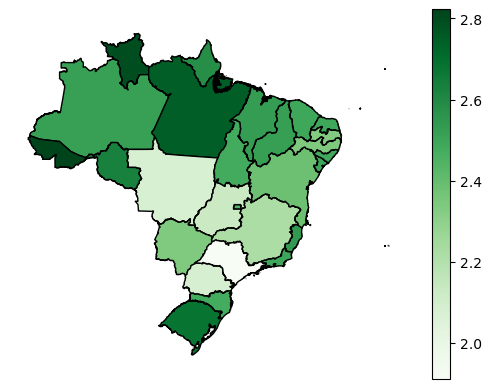

In [16]:
gdf_estados_preco_combustivel_populacao.plot(column='PRECO MEDIO REVENDA', legend=True, cmap='Greens', edgecolor='black').set_axis_off()

Agora, criando as mesmas tabelas, porém, separando por Regiões ao invés de Estados

In [23]:
df_produtores_etanol_por_estado_media_media_regiao = df_produtores_etanol_por_estado.groupby(['regiao'])['producao'].mean().sort_values(ascending=False)
df_produtores_etanol_por_estado_media_media_regiao

regiao
SUDESTE         180938.941190
CENTRO OESTE     95882.003193
SUL              20408.558639
NORDESTE          8415.959485
NORTE             1426.466237
Name: producao, dtype: float64

In [18]:
precos_combustiveis_media_regiao = precos_combustiveis.groupby(['REGIAO'])['PRECO MEDIO REVENDA'].mean().sort_values()
precos_combustiveis_media_regiao

REGIAO
CENTRO OESTE    2.245860
SUDESTE         2.293122
SUL             2.412379
NORDESTE        2.451679
NORTE           2.655331
Name: PRECO MEDIO REVENDA, dtype: float64

Maiores produtores:
SUDESTE         180938.941190
CENTRO OESTE     95882.003193
SUL              20408.558639
NORDESTE          8415.959485
NORTE             1426.466237

Menores preços:
CENTRO OESTE    2.245860
SUDESTE         2.293122
SUL             2.412379
NORDESTE        2.451679
NORTE           2.655331

In [19]:
gdf_estados[:5]

,NOME,NOMEABREV,GEOMETRIAA,SIGLA,GEOCODIGO,geometry
0,Ceará,Ceará,Não,CE,23,"MULTIPOLYGON Z (((-40.20093 -2.81293 0.00000, ..."
1,Distrito Federal,Distrito Federal,Não,DF,53,"MULTIPOLYGON Z (((-29.34586 0.91777 0.00000, -..."
2,Espírito Santo,Espírito Santo,Não,ES,32,"MULTIPOLYGON Z (((-40.28188 -20.30203 0.00000,..."
3,Amapá,Amapá,Não,AP,16,"MULTIPOLYGON Z (((-50.50034 2.09786 0.00000, -..."
4,Roraima,Roraima,Não,RR,14,"POLYGON Z ((-63.37846 2.22966 0.00000, -63.371..."


Criando a coluna Região para o Mapa

In [24]:
gdf_estados["regiao"] = "NORDESTE"

gdf_estados.loc[
    (gdf_estados['SIGLA'] == 'RS') | 
    (gdf_estados['SIGLA'] == 'SC') | 
    (gdf_estados['SIGLA'] == 'PR'),'regiao'] = "SUL"

gdf_estados.loc[
    (gdf_estados['SIGLA'] == 'SP') | 
    (gdf_estados['SIGLA'] == 'RJ') | 
    (gdf_estados['SIGLA'] == 'MG') | 
    (gdf_estados['SIGLA'] == 'ES'),'regiao'] = "SUDESTE"

gdf_estados.loc[
    (gdf_estados['SIGLA'] == 'MT') | 
    (gdf_estados['SIGLA'] == 'MS') | 
    (gdf_estados['SIGLA'] == 'GO'),'regiao'] = "CENTRO OESTE"

gdf_estados.loc[
    (gdf_estados['SIGLA'] == 'AM') | 
    (gdf_estados['SIGLA'] == 'RR') | 
    (gdf_estados['SIGLA'] == 'AP') | 
    (gdf_estados['SIGLA'] == 'TO') | 
    (gdf_estados['SIGLA'] == 'RO') | 
    (gdf_estados['SIGLA'] == 'AC') | 
    (gdf_estados['SIGLA'] == 'PA'),'regiao'] = "NORTE"




In [25]:
gdf_estados_producao_por_regiao = gdf_estados.merge(df_produtores_etanol_por_estado_media_media_regiao, left_on='regiao', right_on='regiao')
gdf_estados_producao_por_regiao[:5]

,NOME,NOMEABREV,GEOMETRIAA,SIGLA,GEOCODIGO,geometry,regiao,producao
0,Ceará,Ceará,Não,CE,23,"MULTIPOLYGON Z (((-40.20093 -2.81293 0.00000, ...",NORDESTE,8415.959485
1,Distrito Federal,Distrito Federal,Não,DF,53,"MULTIPOLYGON Z (((-29.34586 0.91777 0.00000, -...",NORDESTE,8415.959485
2,Piauí,Piauí,Não,PI,22,"POLYGON Z ((-41.81276 -2.74636 0.00000, -41.80...",NORDESTE,8415.959485
3,Sergipe,Sergipe,Não,SE,28,"MULTIPOLYGON Z (((-37.02340 -10.93902 0.00000,...",NORDESTE,8415.959485
4,Bahia,Bahia,Não,BA,29,"MULTIPOLYGON Z (((-38.69154 -12.66674 0.00000,...",NORDESTE,8415.959485


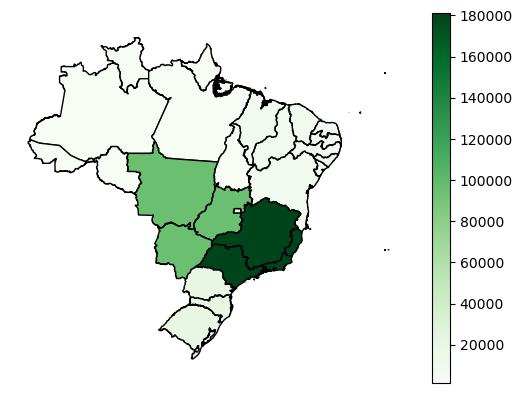

In [26]:
gdf_estados_producao_por_regiao.plot(column='producao', legend=True, cmap='Greens', edgecolor='black').set_axis_off()

Criando o mesmo mapa, porém, com base logarítimica

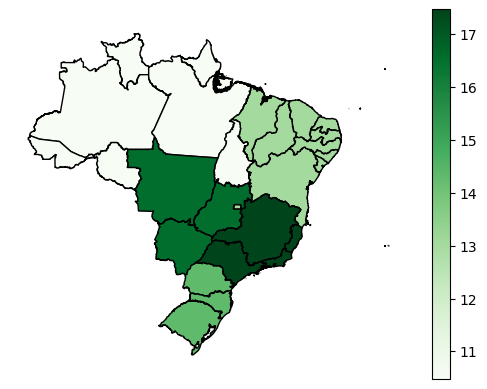

In [27]:
gdf_estados_producao_por_regiao['producao_log'] = np.log2(gdf_estados_producao_por_regiao['producao'])
gdf_estados_producao_por_regiao.plot(column='producao_log', legend=True, cmap='Greens', edgecolor='black').set_axis_off()

In [28]:
gdf_estados_preco_combustivel_por_regiao = gdf_estados.merge(precos_combustiveis_media_regiao, left_on='regiao', right_on='REGIAO')
gdf_estados_preco_combustivel_por_regiao[:5]

,NOME,NOMEABREV,GEOMETRIAA,SIGLA,GEOCODIGO,geometry,regiao,PRECO MEDIO REVENDA
0,Ceará,Ceará,Não,CE,23,"MULTIPOLYGON Z (((-40.20093 -2.81293 0.00000, ...",NORDESTE,2.451679
1,Distrito Federal,Distrito Federal,Não,DF,53,"MULTIPOLYGON Z (((-29.34586 0.91777 0.00000, -...",NORDESTE,2.451679
2,Piauí,Piauí,Não,PI,22,"POLYGON Z ((-41.81276 -2.74636 0.00000, -41.80...",NORDESTE,2.451679
3,Sergipe,Sergipe,Não,SE,28,"MULTIPOLYGON Z (((-37.02340 -10.93902 0.00000,...",NORDESTE,2.451679
4,Bahia,Bahia,Não,BA,29,"MULTIPOLYGON Z (((-38.69154 -12.66674 0.00000,...",NORDESTE,2.451679


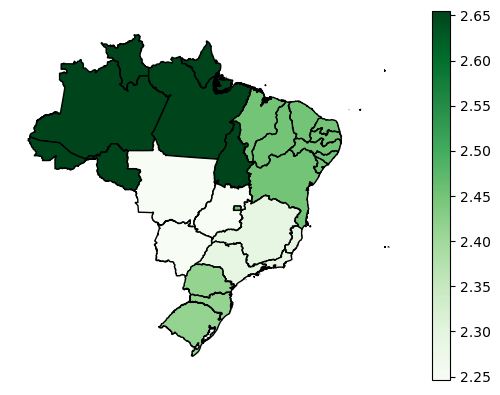

In [29]:
gdf_estados_preco_combustivel_por_regiao.plot(column='PRECO MEDIO REVENDA', legend=True, cmap='Greens', edgecolor='black').set_axis_off()

Criação de dataframe que junta as informações de produção por população e de preço do etanol.

In [20]:
df_produtores_etanol_por_estado_media.head()

sigla_uf
AC       72.657626
AL    19292.520996
AM      242.286874
AP        0.000000
BA     9088.684276
Name: producao, dtype: float64

In [21]:

df_por_estado = df_produtores_etanol_por_estado_media.to_frame(name="producao").reset_index()


df_por_estado = df_por_estado.merge(precos_combustiveis_media_estado, left_on='sigla_uf', right_on='ESTADO')


df_por_estado.head()


,sigla_uf,producao,PRECO MEDIO REVENDA
0,AC,72.657626,2.822432
1,AL,19292.520996,2.485334
2,AM,242.286874,2.517717
3,AP,0.000000,2.582808
4,BA,9088.684276,2.382027


In [22]:
corr, p_value = scipy.stats.spearmanr(df_por_estado["producao"], df_por_estado["PRECO MEDIO REVENDA"])


print(corr, p_value)

# p_value = 0.00000764721568656832

-0.7468672742666072 7.64721568656832e-06


In [30]:

df_por_regiao = df_produtores_etanol_por_estado_media_media_regiao.to_frame(name="producao").reset_index()


df_por_regiao = df_por_regiao.merge(precos_combustiveis_media_regiao, left_on='regiao', right_on='REGIAO')


df_por_regiao.head()


,regiao,producao,PRECO MEDIO REVENDA
0,SUDESTE,180938.941190,2.293122
1,CENTRO OESTE,95882.003193,2.245860
2,SUL,20408.558639,2.412379
3,NORDESTE,8415.959485,2.451679
4,NORTE,1426.466237,2.655331


In [31]:
corr, p_value = scipy.stats.spearmanr(df_por_regiao["producao"], df_por_regiao["PRECO MEDIO REVENDA"])


print(corr, p_value)

-0.8999999999999998 0.03738607346849874
